<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цель проекта: Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
Построить модель с предельно большим значением F1-меры, нужно довести метрику до 0.59. Проверить F1-меру на тестовой выборке.**

Этапы выполнения:

    Загрузить и подготовить данные. Пояснить порядок действий.
    Исследовать баланс классов, обучить модель без учёта дисбаланса.
    Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. 
    Провести финальное тестирование.

## Подготовка данных

Импортируем необходимые модули и библиотеки. Загрузим данные в датафрейм и выведем первые 20 строк.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt


data = pd.read_csv('Churn.csv')
data.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Выведем общую информацию:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


        RowNumber — индекс строки в данных
        CustomerId — уникальный идентификатор клиента
        Surname — фамилия
        CreditScore — кредитный рейтинг
        Geography — страна проживания
        Gender — пол
        Age — возраст
        Tenure — сколько лет человек является клиентом банка
        Balance — баланс на счёте
        NumOfProducts — количество продуктов банка, используемых клиентом
        HasCrCard — наличие кредитной карты
        IsActiveMember — активность клиента
        EstimatedSalary — предполагаемая зарплата
        Exited — факт ухода клиента

Все необходимые типы данных соответсвуют. Видим пропуски в столбце "Tenure" (сколько лет человек является клиентом банка) - около 9%. Данный параметр представляется важным и может сильно повлиять на результаты прогнозирования. Заполнить пропуски медианными значениями, нулевыми или случайными соответсвенно будет нецелесообразно, поэтому удалим эти строки. 9% это большой объем, но думаю данных будет достаточно для обучения и тестирования модели. 

Можно было бы заполнить столбец "Tenure", сделав его целевым и обучив модель, но в данном проекте думаю это будет лишним)


Столбцы "RowNumber", "CustomerId", "Surname" не понадобятся в процессе обучения модели - их надо удалить.

In [5]:
data = data[(data['Tenure'].isna() != True)]
data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
data.reset_index(drop= True , inplace= True )
data.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9086,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0
9087,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9088,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9089,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9090,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [6]:
data.duplicated().sum()

0

Дубликаты отсутсвуют.

Посмотрим уникальные значения категориальных переменных:

In [7]:
data['Geography'].value_counts()

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

In [8]:
data['Gender'].value_counts()

Male      4974
Female    4117
Name: Gender, dtype: int64

In [9]:
data['IsActiveMember'].value_counts()

1    4687
0    4404
Name: IsActiveMember, dtype: int64

In [10]:
data['Exited'].value_counts()

0    7237
1    1854
Name: Exited, dtype: int64

С данными всё в порядке, аномальных занчений нет. 'Exited' является целевым признаком. 

Пострим матрицу рассеяния и таблицу кореляции, чтобы выявить зависимости в количественных переменных:

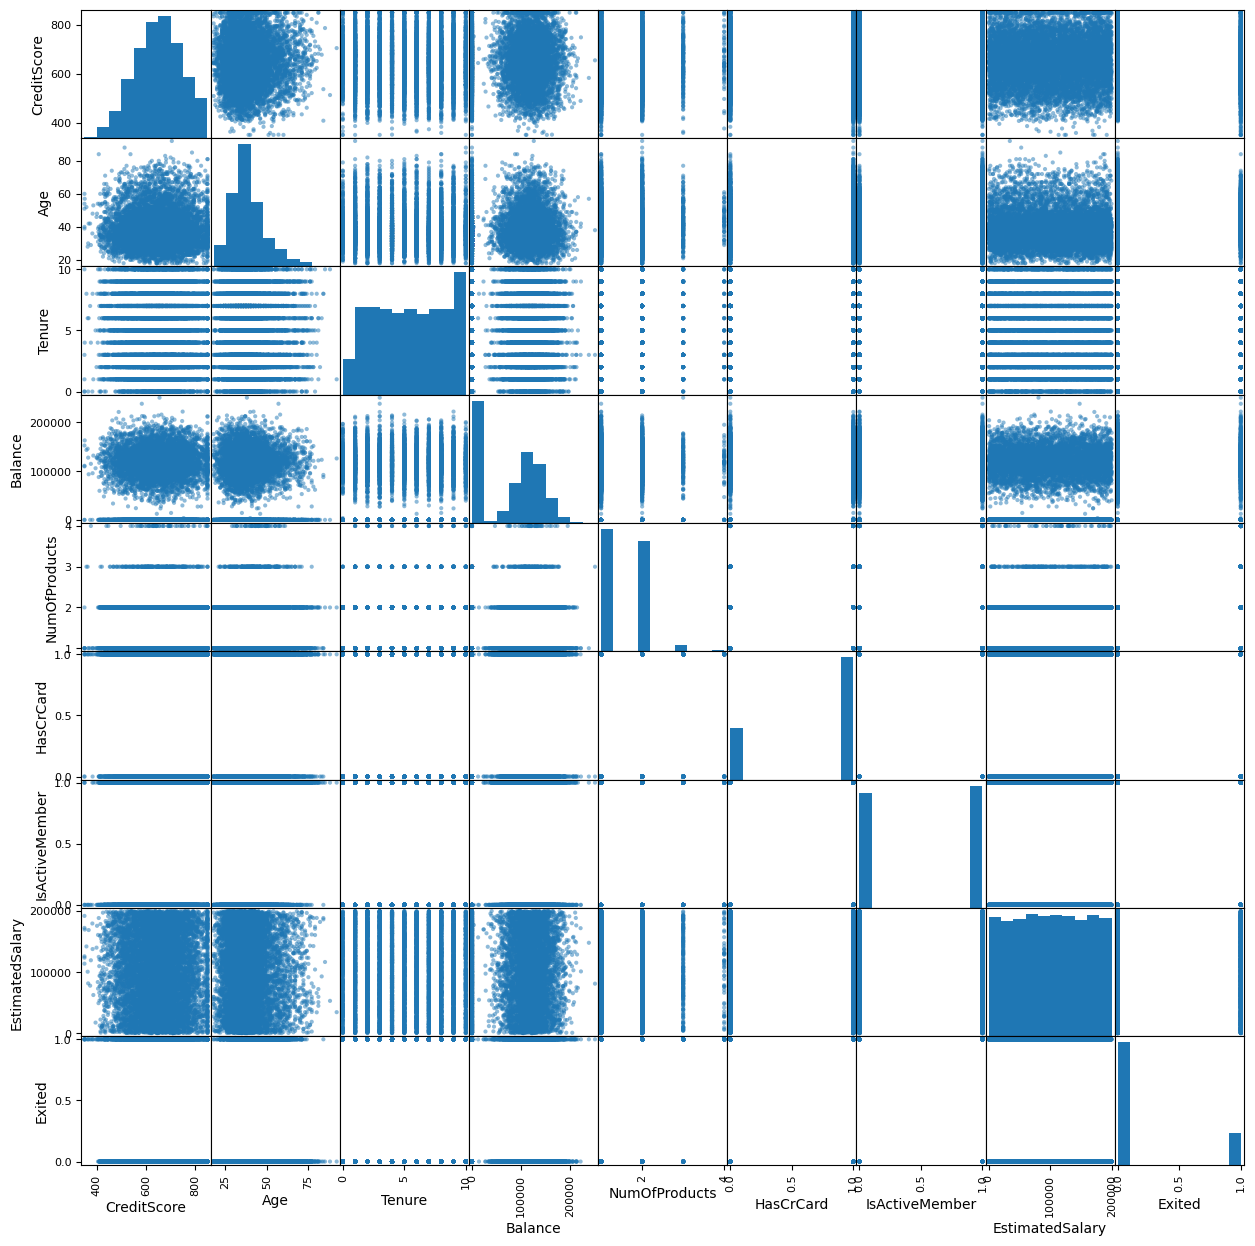

In [11]:
pd.plotting.scatter_matrix(data, figsize=(15, 15));

Зависимостей не видно.

In [12]:
 data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.004504,-0.000062,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950
Age,-0.004504,1.000000,-0.013134,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,0.002804,0.031481,-0.007911,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218
NumOfProducts,0.011090,-0.031877,0.011979,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271
HasCrCard,-0.003937,-0.014129,0.027232,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411
IsActiveMember,0.030947,0.082269,-0.032178,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062
EstimatedSalary,0.005182,-0.007037,0.010520,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029
Exited,-0.023950,0.283017,-0.016761,0.117218,-0.050271,-0.005411,-0.155062,0.016029,1.000000


Явной корреляции в данных не выявлено. Данные подходят для обучения модели.

Использем метод phik_matrix для оценки корреляции:

In [14]:
pip install phik==0.10.0


Note: you may need to restart the kernel to use updated packages.


In [15]:
import phik
data.phik_matrix()

C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\phik\simulation.py:28: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def sim_2d_data(hist:np.ndarray, ndata:int=0) -> np.ndarray:


interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.049082,0.000000,0.000000,0.000000,0.000000,0.040113,0.007910,0.041025,0.041021,0.092598
Geography,0.049082,1.000000,0.012121,0.083915,0.003879,0.464769,0.049003,0.006254,0.007572,0.018600,0.107284
Gender,0.000000,0.012121,1.000000,0.032615,0.031054,0.011366,0.069812,0.000000,0.035291,0.025059,0.171438
Age,0.000000,0.083915,0.032615,1.000000,0.046402,0.028647,0.144832,0.031990,0.188602,0.055886,0.486531
Tenure,0.000000,0.003879,0.031054,0.046402,1.000000,0.063973,0.060387,0.031409,0.027321,0.000000,0.020845
Balance,0.000000,0.464769,0.011366,0.028647,0.063973,1.000000,0.374296,0.053707,0.000000,0.000000,0.185118
NumOfProducts,0.040113,0.049003,0.069812,0.144832,0.060387,0.374296,1.000000,0.000000,0.057994,0.027493,0.560950
HasCrCard,0.007910,0.006254,0.000000,0.031990,0.031409,0.053707,0.000000,1.000000,0.000000,0.000000,0.000000
IsActiveMember,0.041025,0.007572,0.035291,0.188602,0.027321,0.000000,0.057994,0.000000,1.000000,0.035863,0.240225
EstimatedSalary,0.041021,0.018600,0.025059,0.055886,0.000000,0.000000,0.027493,0.000000,0.035863,1.000000,0.000000


interval columns not set, guessing: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


<AxesSubplot:>

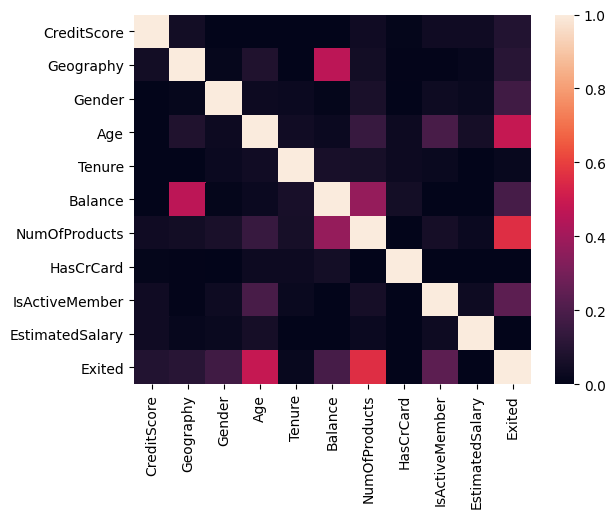

In [16]:
import seaborn as sns
sns.heatmap(data.phik_matrix())

Используя метод phik_matrix можно заметить корреляцию между Geography и  Balance, а так же видим взаимосвязь целевого признака Exited	с признаками Age и NumOfProducts.


Применим прямое кодирование ко всему датафрейму. Вызовим функцию pd.get_dummies() c аргументом drop_first. Сохраним таблицу в переменной data_ohe.

In [17]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe_encoder = ohe.fit_transform(data['Gender'].values.reshape(-1, 1)) 
data_encoder = pd.DataFrame(ohe_encoder.toarray(), columns=ohe.categories_)
data_encoder.tail()

,Female,Male
9086,1.0,0.0
9087,0.0,1.0
9088,0.0,1.0
9089,1.0,0.0
9090,0.0,1.0


In [19]:
final_data = data.join(data_encoder, how ='left')
final_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,"(Female,)","(Male,)"
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,1.0,0.0
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,1.0,0.0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,1.0,0.0
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,1.0,0.0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0,1.0,0.0
9087,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0,0.0,1.0
9088,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0,0.0,1.0
9089,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1,1.0,0.0


Посмотрим на получившуюся таблицу:

In [20]:
data_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


Таблица стала шире. Появились новые столбцы: "Geography_Germany", "Geography_Spain","Gender_Male". А столбцы "Geography" и "Gender_Male" исчезли.

In [21]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 666.0 KB


Теперь все признаки в числовом формате.

In [22]:
data_ohe.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,0.704983,0.515565,100181.214924,0.203938,0.252227,0.247278,0.547135
std,96.410471,10.555581,2.894723,62329.528576,0.581003,0.456076,0.499785,57624.755647,0.402946,0.434315,0.431453,0.497801
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51227.745000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,1.000000,1.000000,100240.200000,0.000000,0.000000,0.000000,1.000000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,1.000000,1.000000,149567.210000,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


Выбивающихся значений не видно. 

Разделим исходные данные на три выборки в соотношении 60:20:20 (%):

In [23]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.40, random_state=42, stratify=target)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=42, stratify=target_valid)

[data_ohe.shape[0], features_train.shape[0], features_valid.shape[0], features_test.shape[0]]

[9091, 5454, 1818, 1819]

Стандартизируем численные признаки. Создадим объект структуры StandardScaler() и настроим его на обучающих данных. В переменной numeric - список всех численных признаков.
Сохраним преобразованные обучающую, валидационную и тестовую выборки в переменных: features_train, features_valid и features_test: 

In [24]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Age', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])
pd.options.mode.chained_assignment = None

features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2924,-0.689347,-0.944503,1.737181,-1.223083,0.813512,1,1,0.194467,0,0,0
3384,0.913235,-0.944503,1.391431,1.004114,-0.918297,1,0,0.725671,1,0,0
7959,0.799504,2.116464,-1.720318,0.829721,0.813512,1,1,1.539459,0,0,1
3727,0.644415,1.255567,1.391431,-1.223083,-0.918297,1,1,0.310683,0,1,1
7948,-0.772061,-0.848848,1.045681,-1.223083,0.813512,1,0,1.480628,0,1,0


In [25]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3233,0.148131,-0.274917,0.354181,-0.084033,0.813512,1,0,0.388066,1,0,1
1994,0.809843,0.681636,-1.028818,0.533386,-0.918297,1,0,-1.386128,0,0,0
4492,0.106774,-0.561882,-1.028818,0.065179,-0.918297,0,0,0.874168,0,1,1
4428,-0.730704,-0.753193,0.354181,-1.223083,0.813512,1,0,-1.284140,0,0,1
1678,-1.743950,0.490325,1.391431,1.583653,-0.918297,1,0,-0.600708,0,0,1


In [26]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2061,-0.203403,1.064257,-0.683068,0.848244,4.277129,1,1,-0.908549,1,0,1
8843,0.013721,-1.518435,1.737181,-1.223083,0.813512,1,1,1.215906,0,0,1
6795,-1.154613,0.299015,-0.337319,0.063866,-0.918297,1,0,0.332201,1,0,0
772,0.292881,-1.327124,1.737181,0.009236,0.813512,0,1,0.545565,1,0,0
1093,-0.958168,-1.040159,0.699931,1.121617,0.813512,1,0,1.462845,0,0,0


Данные подготовлены. Преобразовали категориальные признаки в численные техникой прямого кодирования, масштабировали численные признаки. Можно приступить к исследованию задачи.

## Исследование задачи

Проверим баланс классов:

In [27]:
[target_train.value_counts(normalize = True),
 target_valid.value_counts(normalize = True),
 target_test.value_counts(normalize = True)]

[0    0.796113
 1    0.203887
 Name: Exited, dtype: float64,
 0    0.79593
 1    0.20407
 Name: Exited, dtype: float64,
 0    0.796042
 1    0.203958
 Name: Exited, dtype: float64]

Классы являются несбалансированными, так как делятся в соотношении 79.6% и 20.4%.

**Исследуем модели обучения без учета дисбаланса классов. И визаулизируем их работу ROC кривой.**


Обучим модель логистической регрессии и посчитаем метрики на валидационной выборке:

Полнота: 0.1778975741239892
Точность: 0.584070796460177
F1 score: 0.27272727272727276
ROC_auc score: 0.7522935267129501
Accuracy: 0.8063806380638063
Матрица ошибок:
[[1400   47]
 [ 305   66]]


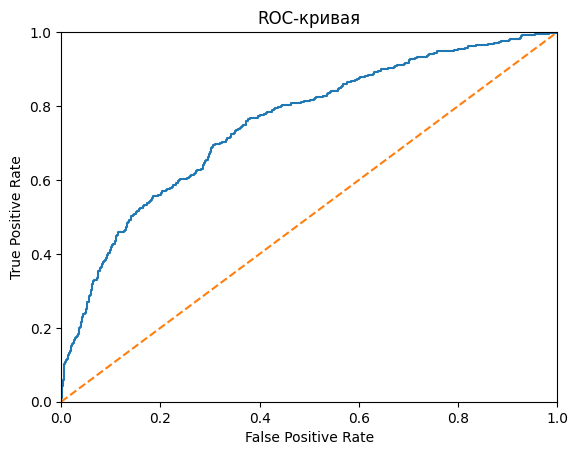

In [28]:
model_lr_unbalanced = LogisticRegression(random_state=42, solver='liblinear')
model_lr_unbalanced.fit(features_train, target_train)
predicted_valid = model_lr_unbalanced.predict(features_valid)

probabilities_valid = model_lr_unbalanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("ROC_auc score:", roc_auc)
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()


Полнота низкая всего 0.17, что говорит о том что модель плохо ищет положительные ответы -в данном случае плохо определяет факт ухода клиентов. Доля правильных положительный ответов всего 58% (точность). Отсюда наблюдаем низкий уровень F1 score. По матрице ошибок можно заметить, что много ложноотрицательных ответов.  ROC кривая не сильно выгнута к левому углу хоть и находится выше случайной модели и площадь под кривой ROC_auc score равна 0.75.

Обучим модель дерева решений (в цикле подберем глубину) и посчитаем метрики на валидационной выборке:

Полнота: 0.48787061994609165
Точность: 0.5041782729805014
F1 score: 0.4958904109589041
Accuracy: 0.7975797579757976
Матрица ошибок:
[[1269  178]
 [ 190  181]]
ROC_auc score: 0.682428744665513


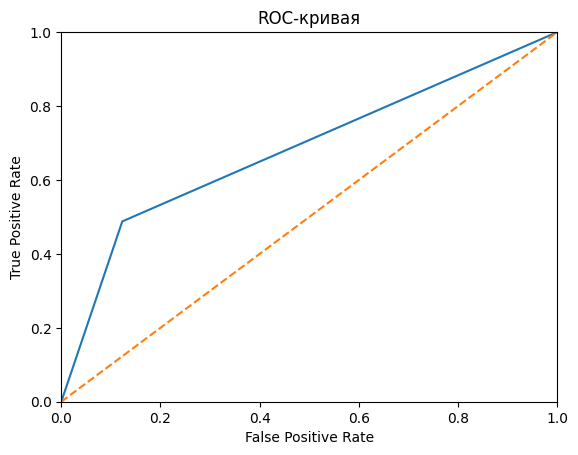

In [29]:
best_model_tc_unbalanced = None
best_result_tc = 0
for depth in range(1, 30):
    model_tree_unbalanced = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model_tree_unbalanced.fit(features_train, target_train)
    predictions = model_tree_unbalanced.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_tc:
        best_model_tc_unbalanced = model_tree_unbalanced
        predicted_valid = predictions

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))


probabilities_valid = best_model_tc_unbalanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

Полнота, точность и соответсвенно F1 score близка к 0.5. По матрице ошибок можно заметить, что TP, FP и FN примерно одинаковые.  А ROC_auc score равна 0.68. Модель не сильно лучше слуйчайной, что видно и по ROC кривой.

Обучим модель случайного леса (в цикле подберем глубину) и посчитаем метрики на валидационной выборке:

Полнота: 0.40970350404312667
Точность: 0.8128342245989305
F1 score: 0.5448028673835126
Accuracy: 0.8602860286028603
Матрица ошибок:
[[1412   35]
 [ 219  152]]
ROC_auc score: 0.8590186592950932


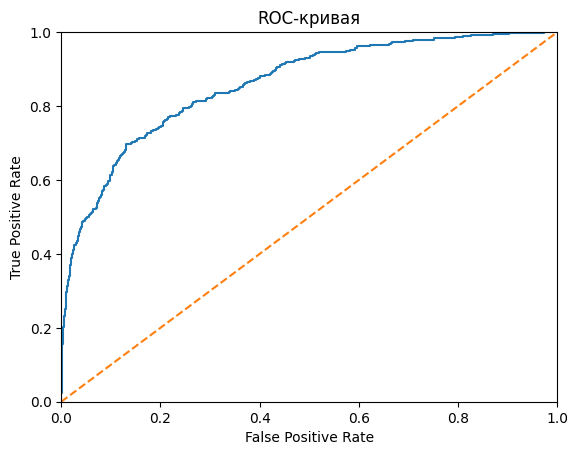

In [30]:
best_model_rf_unbalanced = None
best_result_rf = 0
for depth in range(1, 16, 1):
    
    model_rf_unbalanced = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=depth)
    model_rf_unbalanced.fit(features_train, target_train)
    predictions = model_rf_unbalanced.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_rf:
        best_model_rf_unbalanced = model_rf_unbalanced
        best_result_rf = result
        
predicted_valid = best_model_rf_unbalanced.predict(features_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

probabilities_valid = best_model_rf_unbalanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

Данная модель выглядит более предпочтительной, по сравнению с предыдущими. Полнота 0.41 - низкая, то есть доля правильных положительных ответов всего 41%. Точность высокая 81%, а F1 score 0.54. Модель дает мало положительных ответов.

**Изучили три модели без учета дисбаланса классов: модели логистической регресии, дерева решений и случайного леса. Модели логистической регресии, дерева решений не пригодны для использования. А модель случайного леса сильно занижает количество положительных ответов. Необходимо обучить модели с учётом дисбаланса классов и проверить их работу.**

## Борьба с дисбалансом

**Применим в моделях взвешивание классов**- сделаем аргумент class_weight='balanced', обучим модели и посчитаем метрики на валидационной выборке.

Логистическая регрессия с аргументом class_weight='balanced':

Полнота: 0.6711590296495957
Точность: 0.375
F1 score: 0.48115942028985503
ROC_auc score: 0.7566095481496246
Accuracy: 0.7046204620462047
Матрица ошибок:
[[1032  415]
 [ 122  249]]


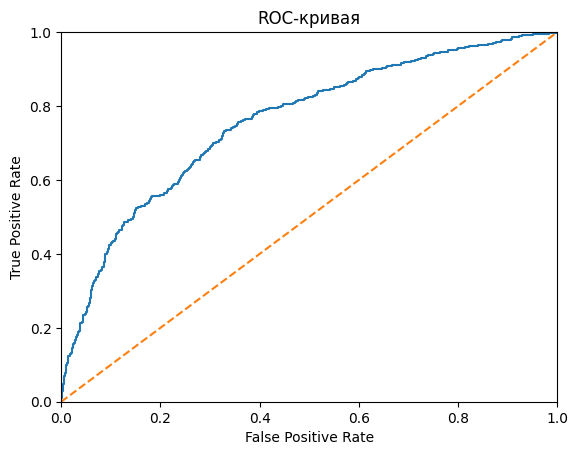

In [31]:
model_lr_class_weight = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model_lr_class_weight.fit(features_train, target_train)
predicted_valid = model_lr_class_weight.predict(features_valid)

probabilities_valid = model_lr_class_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("ROC_auc score:", roc_auc)
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

Полнота выросла до 0.67, точность упала до 0.375 - что говорит о том что модель дает много положительных ответов. ROC_auc score осталась на уровне 0.75. Несмотря на то, что приминение взвешивания классов улучшила метрику F1 score до 0.48, всё же качество предсказаний осталось низким.

Дерево решений с аргументом class_weight='balanced':

Полнота: 0.49595687331536387
Точность: 0.5096952908587258
F1 score: 0.5027322404371585
Accuracy: 0.7997799779977998
Матрица ошибок:
[[1270  177]
 [ 187  184]]
ROC_auc score: 0.6868174138518769


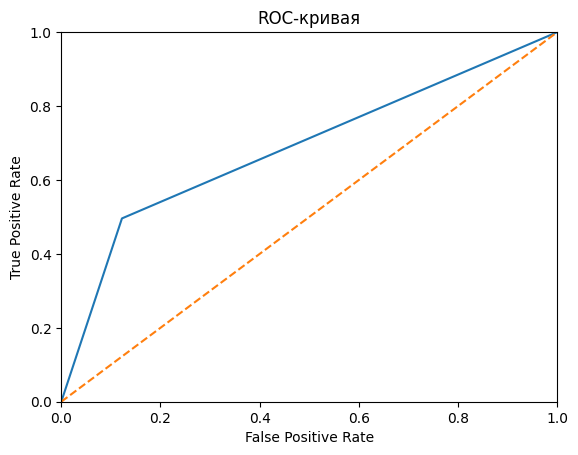

In [32]:
best_model_tc_class_weight = None
best_result_tc = 0
for depth in range(1, 30):
                model_tc_class_weight = DecisionTreeClassifier(random_state=42, max_depth=depth, class_weight='balanced')
                model_tc_class_weight.fit(features_train, target_train)
                predictions = model_tc_class_weight.predict(features_valid)
                result = f1_score(target_valid, predictions)
                if result > best_result_tc:
                    best_model_tc_class_weight = model_tc_class_weight
                    predicted_valid = predictions

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))


probabilities_valid = best_model_tc_class_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()


class_weight='balanced' практически не повлиял на обучение дерева решений.

Рассмотрим случайный лес с class_weight='balanced':

Полнота: 0.6199460916442049
Точность: 0.625
F1 score: 0.6224627875507442
Accuracy: 0.8465346534653465
Матрица ошибок:
[[1309  138]
 [ 141  230]]
ROC_auc score: 0.8607286755570125


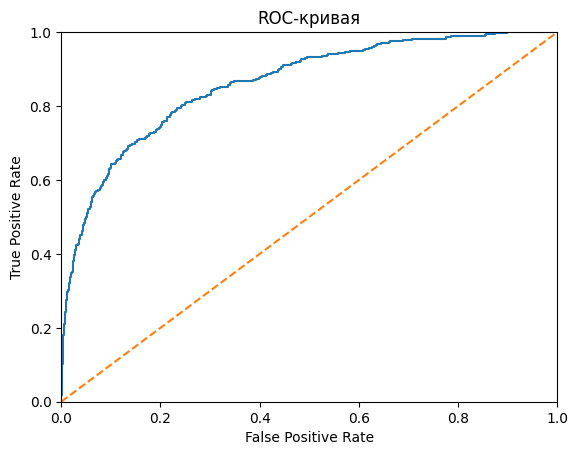

In [33]:
best_model_rf_class_weight = None
best_result_rf = 0
for depth in range(1, 16, 1):
    
    model_rf_class_weight = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=depth, class_weight='balanced')
    model_rf_class_weight.fit(features_train, target_train)
    predictions = model_rf_class_weight.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_rf:
        best_model_rf_class_weight = model_rf_class_weight
        best_result_rf = result
        
predicted_valid = best_model_rf_class_weight.predict(features_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

probabilities_valid = best_model_rf_class_weight.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()



Видим, что F1 score увеличилось до 0.62! Так как модель стала больше предсказывать положительных ответов - увеличилась полнота и уменьшилась точность. ROC_auc score осталась на прежнем уровне 0.85. Данная модель на текущий момент наиболее сбалансированная. 

**Обучим модель применив технику увеличения выборки (upsampling):**

Создадим функцию для увеличения выборки обучающих данных:

In [34]:
from sklearn.utils import shuffle
def upsample(features, target, repeat):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Обучим на них модель логистической регрессии и посмотрим метрики на валидационной выборке:

Полнота: 0.6792452830188679
Точность: 0.3727810650887574
F1 score: 0.48137535816618915
ROC_auc score: 0.7566635682711884
Accuracy: 0.7013201320132013
Матрица ошибок:
[[1023  424]
 [ 119  252]]


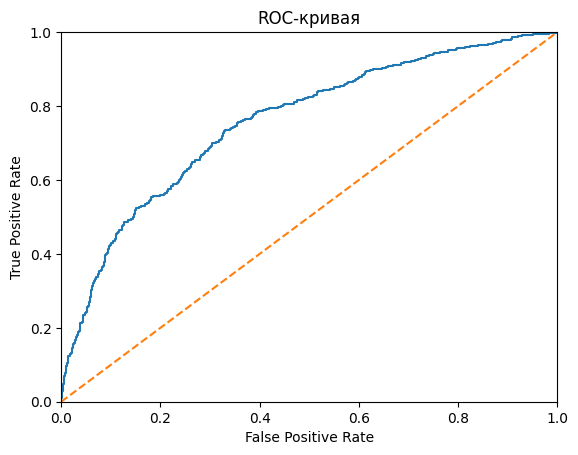

In [35]:
model_lr_upsampling = LogisticRegression(random_state=42, solver='liblinear')
model_lr_upsampling.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr_upsampling.predict(features_valid)

probabilities_valid = model_lr_upsampling.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("ROC_auc score:", roc_auc)
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()


upsampling для модели логистической регрессии показвает такой же результат что и при взвешивании классов.


Дерева решений:

Полнота: 0.48787061994609165
Точность: 0.5041782729805014
F1 score: 0.4958904109589041
Accuracy: 0.7975797579757976
Матрица ошибок:
[[1269  178]
 [ 190  181]]
ROC_auc score: 0.682428744665513


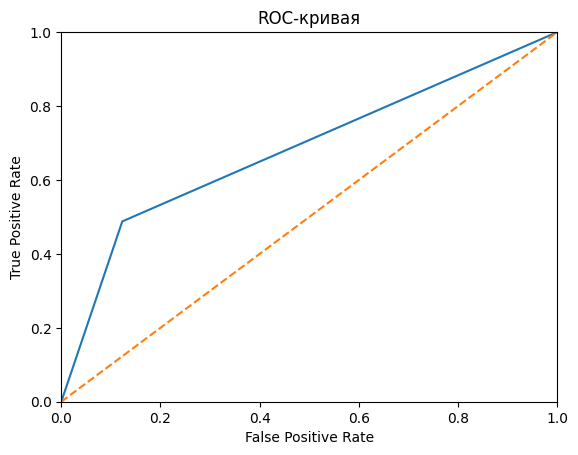

In [36]:
best_model_tc_upsampled = None
best_result_tc = 0
for depth in range(1, 35):
    model_tc_upsampled = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model_tc_upsampled.fit(features_upsampled, target_upsampled)
    predictions = model_tc_upsampled.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_tc:
        best_model_tc_upsampled = model_tc_upsampled
        predicted_valid = predictions

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))


probabilities_valid = best_model_tc_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()


F1 score: 0.49. Для дерева решений аналогичный результат.

Модель случайного леса:

Полнота: 0.6657681940700808
Точность: 0.5980629539951574
F1 score: 0.6301020408163265
Accuracy: 0.8404840484048405
Матрица ошибок:
[[1281  166]
 [ 124  247]]
ROC_auc score: 0.8625951638951861


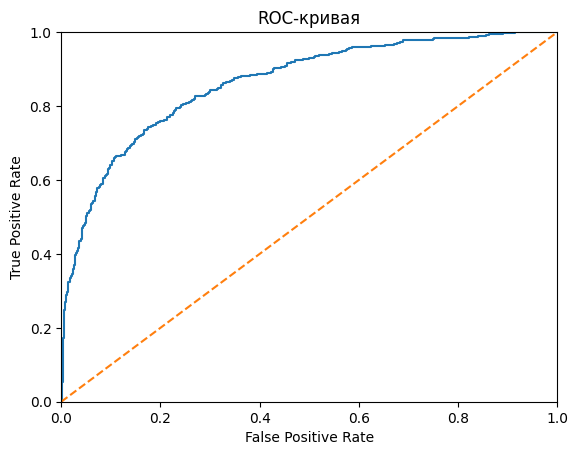

In [37]:
best_model_rf_upsampled = None
best_result_rf = 0
for depth in range(1, 16, 1):
    
    model_rf_upsampled = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=depth)
    model_rf_upsampled.fit(features_upsampled, target_upsampled)
    predictions = model_rf_upsampled.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_rf:
        best_model_rf_upsampled = model_rf_upsampled
        best_result_rf = result
        
predicted_valid = best_model_rf_upsampled.predict(features_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

probabilities_valid = best_model_rf_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)


fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()


upsampling незначительно лучше, чем при использований взвешивания классов. 

**Обучим модель применив технику уменьшение выборки (downsampling):**

Создадим функцию для уменьшения выборки обучающих данных:

In [38]:
def downsample(features, target, fraction):
    features_zeros = features_train[target == 0]
    features_ones = features_train[target == 1]
    target_zeros = target_train[target == 0]
    target_ones = target_train[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Обучим на них модель логистической регрессии и посмотрим метрики на валидационной выборке:

In [39]:
model_lr_downsampling = LogisticRegression(random_state=42, solver='liblinear')
model_lr_downsampling.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr_downsampling.predict(features_valid)

probabilities_valid = model_lr_downsampling.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc = roc_auc_score(target_valid, probabilities_one_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("ROC_auc score:", roc_auc)
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))


Полнота: 0.6738544474393531
Точность: 0.37037037037037035
F1 score: 0.47801147227533464
ROC_auc score: 0.7537036381620491
Accuracy: 0.6996699669966997
Матрица ошибок:
[[1022  425]
 [ 121  250]]


downsampling не показывает эффективность на модели логистической регрессии.

Дерева решений:

In [40]:
best_model_tc_downsample = None
best_result_tc = 0
for depth in range(1, 30):
                model_tc_downsample = DecisionTreeClassifier(random_state=42, max_depth=depth)
                model_tc_downsample.fit(features_downsampled, target_downsampled)
                predictions = model_tc_downsample.predict(features_valid)
                result = f1_score(target_valid, predictions)
                if result > best_result_tc:
                    best_model_tc_downsample = model_tc_downsample
                    predicted_valid = predictions

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))


probabilities_valid = best_model_tc_downsample.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)

Полнота: 0.6873315363881402
Точность: 0.3653295128939828
F1 score: 0.4770813844714687
Accuracy: 0.6925192519251925
Матрица ошибок:
[[1004  443]
 [ 116  255]]
ROC_auc score: 0.6905904399286934


downsampling не показывает эффективность на модели дерева решений.

Модель случайного леса:

In [41]:
best_model_rf_downsampling = None
best_result_rf = 0
for depth in range(1, 16, 1):
    
    model_rf_downsampling = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=depth)
    model_rf_downsampling.fit(features_downsampled, target_downsampled)
    predictions = model_rf_downsampling.predict(features_valid)
    result = f1_score(target_valid, predictions)
    if result > best_result_rf:
        best_model_rf_downsampling = model_rf_downsampling
        best_result_rf = result
        
predicted_valid = best_model_rf_downsampling.predict(features_valid)

print("Полнота:", recall_score(target_valid, predicted_valid))
print("Точность:", precision_score(target_valid, predicted_valid))
print("F1 score:", f1_score(target_valid, predicted_valid))
print("Accuracy:", accuracy_score(target_valid, predicted_valid))
print("Матрица ошибок:")
print(confusion_matrix(target_valid, predicted_valid))

probabilities_valid = best_model_rf_downsampling.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_auc score:", auc_roc)


Полнота: 0.77088948787062
Точность: 0.49140893470790376
F1 score: 0.6002098635886673
Accuracy: 0.7904290429042904
Матрица ошибок:
[[1151  296]
 [  85  286]]
ROC_auc score: 0.8548162663899843


Предсказания модели случайного леса при уменьшении выборки обучающих данных похуже чем при увеличении. Полнота улучшилась, точность уменьшилась, f1-мера 0.60. 

В ходе борьбы с дисбалансом классов наилучшие результаты показала модель случайного леса при увеличении выборки обучающих данных. Полнота: 0.66, Точность: 0.598, F1 score: 0.63, ROC_auc score: 0.86.

Посмотрим оптимальный порог классификации для лучшей модели (best_model_rf_upsampled):

In [42]:
probabilities_valid = best_model_rf_upsampled.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.6, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f}, F1 score = {:.3f}".format(
        threshold, precision, recall, f1_score(target_valid, predicted_valid)))

Порог = 0.00 | Точность = 0.204, Полнота = 1.000, F1 score = 0.339
Порог = 0.02 | Точность = 0.206, Полнота = 1.000, F1 score = 0.342
Порог = 0.04 | Точность = 0.218, Полнота = 1.000, F1 score = 0.358
Порог = 0.06 | Точность = 0.228, Полнота = 0.995, F1 score = 0.371
Порог = 0.08 | Точность = 0.237, Полнота = 0.984, F1 score = 0.382
Порог = 0.10 | Точность = 0.247, Полнота = 0.984, F1 score = 0.395
Порог = 0.12 | Точность = 0.256, Полнота = 0.978, F1 score = 0.406
Порог = 0.14 | Точность = 0.269, Полнота = 0.970, F1 score = 0.421
Порог = 0.16 | Точность = 0.285, Полнота = 0.960, F1 score = 0.440
Порог = 0.18 | Точность = 0.298, Полнота = 0.949, F1 score = 0.454
Порог = 0.20 | Точность = 0.316, Полнота = 0.938, F1 score = 0.472
Порог = 0.22 | Точность = 0.334, Полнота = 0.925, F1 score = 0.490
Порог = 0.24 | Точность = 0.350, Полнота = 0.898, F1 score = 0.503
Порог = 0.26 | Точность = 0.373, Полнота = 0.884, F1 score = 0.524
Порог = 0.28 | Точность = 0.392, Полнота = 0.871, F1 score = 0

Наилучший порог классификации: Порог = 0.50 | Точность = 0.598, Полнота = 0.666, F1 score = 0.630.

Хотя можно рассмотреть и порог 0.40, при котором полнота наибольшая и F1 мера укладывается в целевые 0.59. В данном проекте я думаю полнота более важный параметр, так как при прогнозировании оттока клиентов лучше перестраховаться и захватить большее количество клиентов.

## Тестирование модели

Проверим лучшую модель на тестовой выборке:

Полнота: 0.6469002695417789
Точность: 0.5555555555555556
F1 score: 0.597758405977584
Accuracy: 0.822429906542056
Матрица ошибок:
[[1256  192]
 [ 131  240]]
ROC_auc score: 0.851433709103364


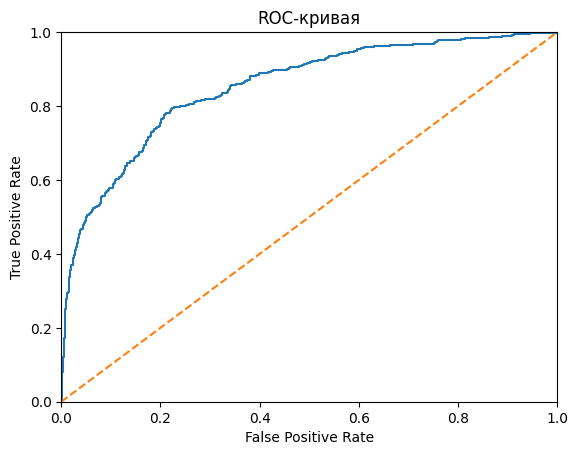

In [43]:
predicted_test = best_model_rf_upsampled.predict(features_test)

print("Полнота:", recall_score(target_test, predicted_test))
print("Точность:", precision_score(target_test, predicted_test))
print("F1 score:", f1_score(target_test, predicted_test))
print("Accuracy:", accuracy_score(target_test, predicted_test))
print("Матрица ошибок:")
print(confusion_matrix(target_test, predicted_test))


probabilities_test = best_model_rf_upsampled.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("ROC_auc score:", auc_roc)


fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.show()

На тестовой выборке модель показала значение F1 score: 0.597, предсказания приемлимые.

**Вывод:**

Перед нами стояла задача: спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Построить модель с предельно большим значением F1-меры, нужно довести метрику до 0.59. Проверить F1-меру на тестовой выборке.

   - Импортировали необходимые библиотеки и модули. Считали файл в датафрейм, вывели первые 20 строк и ознакомились с общей информацией. Убедились в отсутсвии дубликатов и наличии правильных типов данных. Пропуски в столбце "Tenure" удалили. Также удалили столбцы "RowNumber", "CustomerId", "Surname", которые не понадобятся в процессе обучения модели. Посмотрели уникальные значения категориальных переменных.  Пострили матрицу рассеяния и таблицу кореляции, чтобы выявить зависимости в количественных переменных.
   - Применили прямое кодирование ко всему датафрейму, при помощи функции pd.get_dummies() c аргументом drop_first. Сохранили таблицу в переменной data_ohe.
   - Разделили исходные данные на три выборки в соотношении 60:20:20 (%). Использовали функцию train_test_split и применили параметр stratify по столбцу 'target'. Проверили размерность полученных датафреймов.
   - Выполнили стандартизацию численных признаков. Создали объект структуры StandardScaler() и настроили его на обучающих данных. Сохранили преобразованные обучающую, валидационную и тестовую выборки в переменных: features_train, features_valid и features_test.
   - Проверили баланс классов: классы являются несбалансированными, так как делятся в соотношении 79.6% и 20.4%.
   - Изучили три модели без учета дисбаланса классов: модели логистической регресии, дерева решений и случайного леса. Модели логистической регресии (Полнота: 0.17, Точность: 0.58, F1 score: 0.27, ROC_auc score: 0.75), дерева решений (модель не сильно лучше слуйчайной) не пригодны для использования. А модель случайного леса (Полнота 0.41 - низкая, то есть доля правильных положительных ответов всего 41%. Точность высокая 81%, а F1 score 0.54) - модель дает мало положительных ответов.
   - Для борьбы с дисбалансом классов применили в моделях взвешивание классов, увеличение выборки (upsampling) и  уменьшение выборки (downsampling). Модели логистической регресии, дерева решений не показали качественного улучшения. В ходе борьбы с дисбалансом классов хорошие результаты показала только модель случайного леса при увеличении выборки обучающих данных. Полнота: 0.66, Точность: 0.598, F1 score: 0.63, ROC_auc score: 0.86. Наилучший порог классификации: Порог = 0.50.
   - Проверили лучшую модель на тестовой выборке: модель показала значение F1 score: 0.597, предсказания приемлимые.
 
        


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*